<a href="https://colab.research.google.com/github/ajith-kumar05/sentimental-analysis-on-reviews/blob/main/mainbase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import string
import pickle
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.base import TransformerMixin 
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
### Dataset

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/dataset/IMDB Dataset.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
print(f'Rows: {dataset.shape[1]}\nColumns: {dataset.shape[0]}')

Rows: 2
Columns: 50000


In [ ]:
print(f'Columns Names: {list(dataset.columns)}')

Columns Names: ['review', 'sentiment']


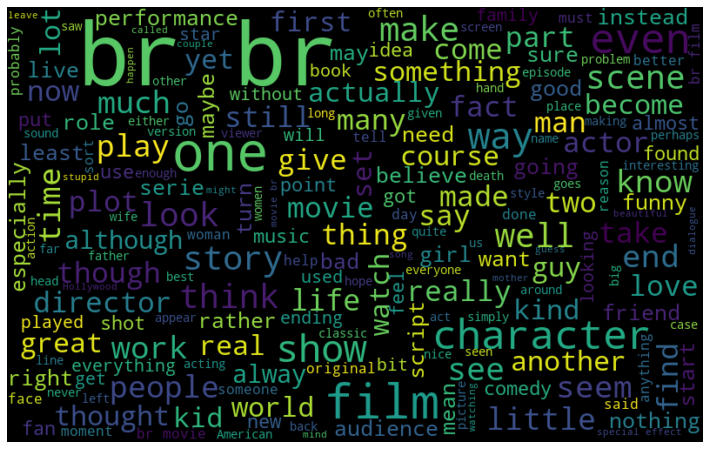

In [ ]:
all_words = " ".join([sentence for sentence in dataset['review']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


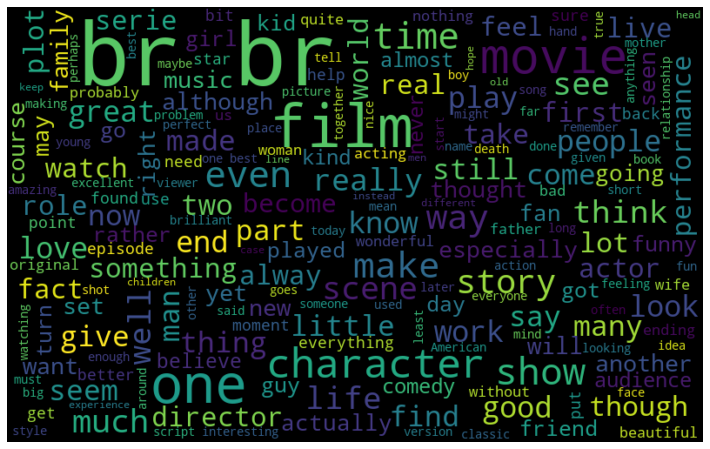

In [ ]:
all_words = " ".join([sentence for sentence in dataset['review'][dataset['sentiment']=='positive']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

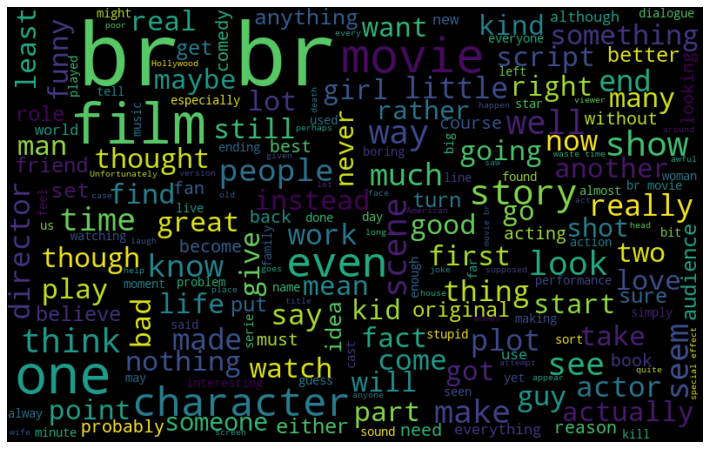

In [ ]:
all_words = " ".join([sentence for sentence in dataset['review'][dataset['sentiment']=='negative']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
### Text Operation 

In [ ]:
nlp = English()
stopwords = list(STOP_WORDS)
punctuations = string.punctuation
print(stopwords)

['‘ve', 'has', 'into', 'already', '’m', 'its', 'for', 'since', 'empty', 'among', 'everything', 'along', 'some', 'see', 'where', 'yourselves', 'thus', 'serious', 'part', 'really', '‘m', '‘re', 'whatever', 'whereby', 'though', 'nobody', 'you', "'ve", 'thereafter', 'of', 'amount', 'least', 'anyway', 'less', 'one', 'herein', "'re", 'thence', 'enough', 'various', 'much', 'itself', 'another', 'ca', 'may', 'us', 'becomes', 're', 'too', '’re', 'third', 'before', 'do', 'whom', 'either', 'almost', 'how', 'go', 'became', 'behind', 'hence', 'former', 'therein', 'besides', 'after', 'against', 'beforehand', 'every', 'perhaps', 'bottom', 'which', 'their', 'toward', 'whither', 'being', 'still', 'any', 'an', 'above', 'latter', 'these', 'whose', 'anyone', 'neither', '’ve', 'so', 'n’t', 'none', '’d', 'many', 'yours', 'four', 'nevertheless', 'it', 'fifteen', 'quite', 'was', 'top', 'although', 'always', 'they', 'can', 'not', 'thereby', 'beside', 'due', 'back', 'formerly', 'everyone', 'everywhere', 'unless'

In [ ]:
def tokenizer(sentence):
    mytokens = nlp(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    return mytokens

In [ ]:
### Transformation and Vectorization

In [ ]:
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]
    def fit(self, X, y, **fit_params):
        return self
    def get_params(self, deep=True):
        return {}

In [ ]:
# Basic function to clean the text 
def clean_text(text):     
    return text.strip().lower()

In [ ]:
review=dataset.review.values

In [ ]:
vectorizer = CountVectorizer().fit(review)

In [ ]:
X=vectorizer.transform(review)

In [ ]:
### Split the Dataset

In [ ]:
y = dataset['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [ ]:
### Logistic Regression

In [ ]:
classifier = LogisticRegression()

# Train the Model
classifier.fit(X_train,y_train)   
LRpred = classifier.predict(X_test)
print(f'Confusion Matrix:\n{confusion_matrix(y_test,LRpred)}')
print(f'\nClassification Report:\n{classification_report(y_test,LRpred)}')
print(f'Accuracy: {accuracy_score(y_test,LRpred)*100}%')
#pickle.dump(classifier, open('saved_model/LinearRegression_model.sav', 'wb'))
print('Logistic Regression trained Model Saved')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Confusion Matrix:
[[4481  570]
 [ 486 4463]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.89      0.89      5051
    positive       0.89      0.90      0.89      4949

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Accuracy: 89.44%
Logistic Regression trained Model Saved


In [ ]:
print(classifier.score(X_test,y_test))

0.8944


In [ ]:
test_array=["Production has an incredibly important place to shoot a series or film. Sometimes even a very minimalist story can reach an incredibly successful point after the right production stages. The Witcher series is far from minimalist. The Witcher is one of the best Middle-earth works in the world. Production quality is essential if you want to handle such a topic successfully."]
#test_array.reshape(1,-1)
doc=vectorizer.transform(test_array)
pre =rfc.predict(doc)
print(f'Prediction: {pre[0]}')

Prediction: positive


In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

#sh = gc.create('review spreadsheet')

i=63

In [ ]:
print(i)

63


In [ ]:
pip install googletrans==3.1.0a0

     |████████████████████████████████| 55 kB 2.4 MB/s 
     |████████████████████████████████| 1.2 MB 9.5 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 65 kB 3.4 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=6e3d58d2f3aef46c08fb901b39ffbd6688fd98056ba57e6b0e55bfb11d9dd670
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [ ]:
from googletrans import Translator

In [ ]:
translator = Translator()

बकवास..समय और पैसे की बर्बादी। -> Crap..waste of time and money.
Prediction: negative


{'spreadsheetId': '1XIOB5C4TPfVgqE39YDrlautl14KSdr-G-Pl2TLSpgfI',
 'updatedCells': 150,
 'updatedColumns': 3,
 'updatedRange': 'Sheet1!A1:C50',
 'updatedRows': 50}